In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pickle

from google.colab import drive
drive.mount('/content/drive')

import os


model_dir = '/content/drive/Shareddrives/1:1_Krishna_Vijay/Results/'

print(os.listdir(model_dir))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['ABBVscalermodel', 'HPT.gsheet', 'best_model_ABBV.h5', 'ABBVGRU_MODEL', 'best_model_ABBV_GRU.h5', 'NVDAGRU_MODEL', 'MSFTGRU_MODEL', 'best_model_MSFT_GRU.h5', 'NVDAscalermodel', 'AMDscalermodel', 'NVDA_scaler.pkl', 'NVDA_columns.txt', 'MSFTscalermodel', 'Models', '.ipynb_checkpoints', 'best_model_NVDA.h5', 'best_model_NVDA_GRU.h5', 'AMD_scaler.pkl', 'AMD_columns.txt', 'best_model_AMD.h5', 'best_model_MSFT.h5', 'MSFT_scaler.pkl']


In [5]:
LSTM_MODEL_PATH = "/content/drive/Shareddrives/1:1_Krishna_Vijay/Results/"
COMPANY = "MSFT"
train_data= pd.read_csv('/content/drive/Shareddrives/1:1_Krishna_Vijay/Dataset/train_AMD.csv')
test_data=pd.read_csv('/content/drive/Shareddrives/1:1_Krishna_Vijay/Dataset/test_AMD.csv')
# Load the saved model
model_path = os.path.join(LSTM_MODEL_PATH, f"best_model_{COMPANY}.h5")
model = tf.keras.models.load_model(model_path)
print("Model loaded.")

import numpy as np
def prepare_seq(data, seq_len):   #eg seq=len = 50
  sequences, labels = [], []

  #len of data is 1353 then 1353 - 50 is the range
  for i in range(len(data) - seq_len):
    #e0 to 50
    x_temp = data.iloc[i:i+seq_len].values
    #stores 50th value
    y_temp = data.iloc[i+seq_len].values

    sequences.append(x_temp)
    labels.append(y_temp)
  return np.array (sequences), np.array(labels)

# define the sequence length
SEQ_LENGTH = 50
# process the dataset
train_sequences, train_labels = prepare_seq(train_data, SEQ_LENGTH)
test_sequences, test_labels = prepare_seq(test_data, SEQ_LENGTH)
print(train_sequences.shape, test_sequences.shape)

Model loaded.
(957, 50, 4) (202, 50, 4)


7/7 [==============================] - 2s 22ms/step
MSE for open: 6362.802466363968
RMSE for open: 79.76717662274356


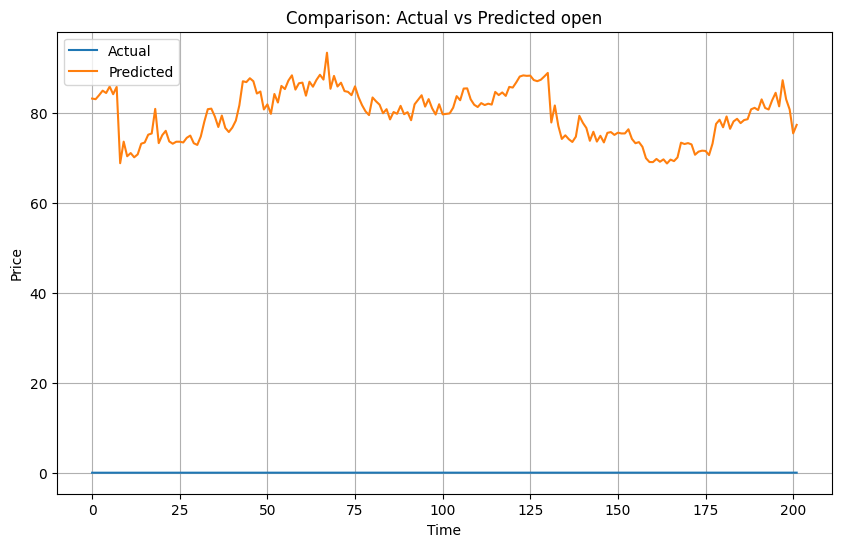

MSE for high: 6231.115968120381
RMSE for high: 78.93741804822591


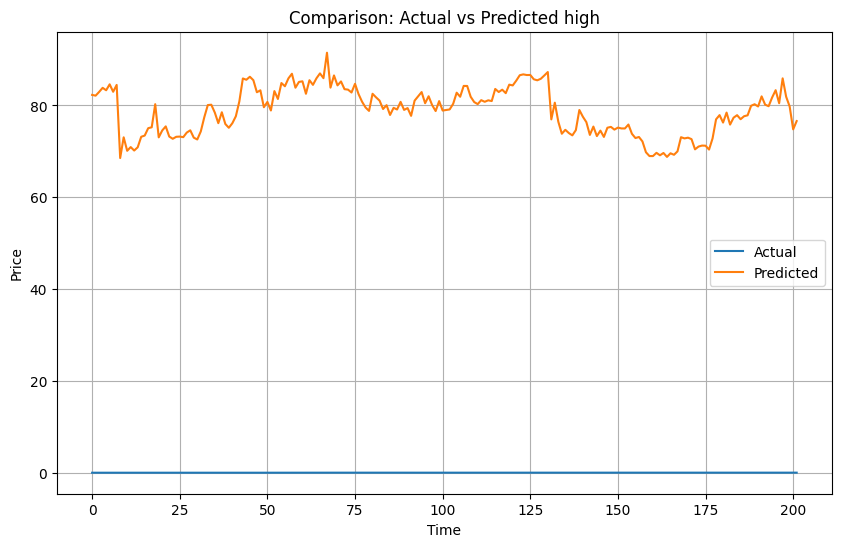

MSE for low: 6149.082430917762
RMSE for low: 78.4160852817696


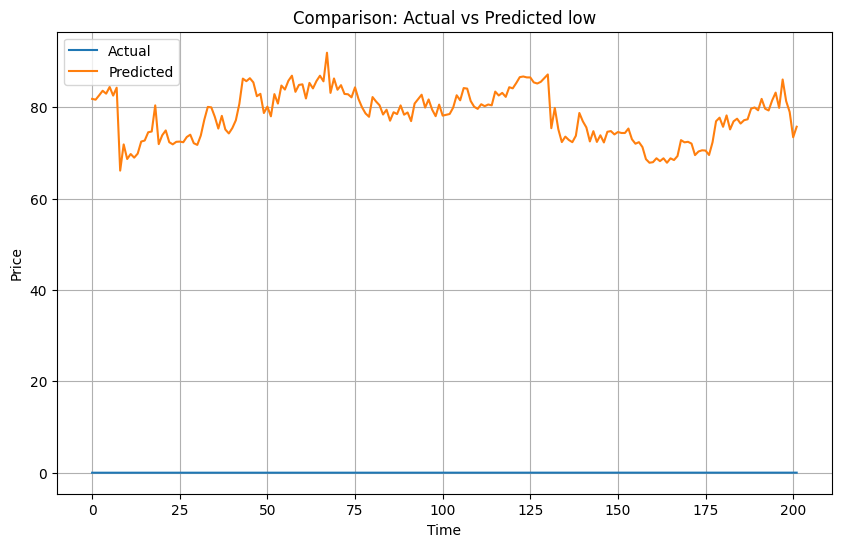

MSE for close: 6230.6494123542125
RMSE for close: 78.93446276724896


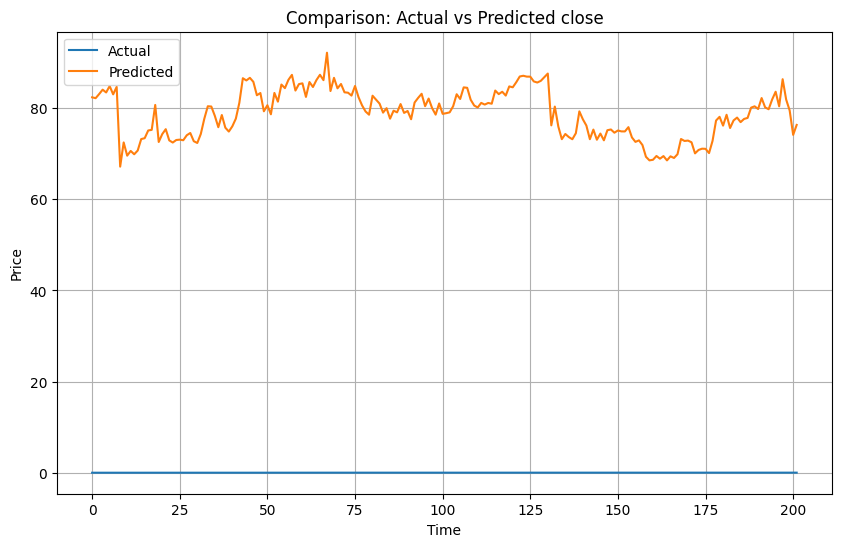

['open', 'high', 'low', 'close']
   open_predicted  high_predicted  low_predicted  close_predicted
0       83.195976       82.286034      81.829239        82.376572
1       83.058762       82.125977      81.660339        82.190102
2       83.962463       82.939835      82.608269        83.089684
3       84.954033       83.829079      83.611069        84.059113
4       84.432564       83.296883      82.972458        83.442703
[[83.19598  82.28603  81.82924  82.37657 ]
 [83.05876  82.12598  81.66034  82.1901  ]
 [83.96246  82.939835 82.60827  83.08968 ]
 [84.95403  83.82908  83.61107  84.05911 ]
 [84.43256  83.29688  82.97246  83.4427  ]
 [85.861694 84.592415 84.45051  84.84949 ]
 [84.163475 82.9671   82.552536 83.02804 ]
 [85.79414  84.4628   84.28568  84.67597 ]
 [68.82121  68.53837  66.13032  67.16749 ]
 [73.61971  73.05263  71.86901  72.47969 ]
 [70.36834  70.11431  68.669106 69.5753  ]
 [71.079834 70.92406  69.76075  70.61145 ]
 [70.13554  70.172356 68.966385 69.88008 ]
 [70.78919  

In [6]:
# Make predictions
df_path = '/content/drive/Shareddrives/1:1_Krishna_Vijay/Dataset/df_NVDA.csv'
df = pd.read_csv(df_path)

# Update COLUMNS based on the actual column names in the CSV file
COLUMNS = df.columns.tolist()

#need to fix NOT WORKING
predictions = model.predict(test_sequences)

scaler_path = os.path.join(LSTM_MODEL_PATH, f"{COMPANY}_scaler.pkl")
with open(scaler_path, 'rb') as file:
    scaler = pickle.load(file)

inverse_predictions = scaler.inverse_transform(predictions)

PRED_COLUMNS = ['open_predicted', 'high_predicted', 'low_predicted', 'close_predicted']
pred_df = pd.DataFrame(inverse_predictions, columns=PRED_COLUMNS)


def evaluations(actual_df, pred_df):
    # Align the DataFrames by index or ensure they are of the same length
    common_length = min(len(actual_df), len(pred_df))
    actual_df = actual_df.iloc[:common_length]
    pred_df = pred_df.iloc[:common_length]

    cols = actual_df.columns.tolist()
    for i, column in enumerate(cols):
        pred_col = PRED_COLUMNS[i]
        mse = mean_squared_error(actual_df[column].values, pred_df[pred_col].values)
        print(f"MSE for {column}: {mse}")
        print(f"RMSE for {column}: {np.sqrt(mse)}")

        plt.figure(figsize=(10, 6))
        plt.plot(actual_df.index, actual_df[column], label="Actual")
        plt.plot(pred_df.index, pred_df[pred_col], label="Predicted")
        plt.xlabel("Time")
        plt.ylabel(f"Price")
        plt.title(f"Comparison: Actual vs Predicted {column}")
        plt.legend()
        plt.grid(True)
        plt.show()

# Call the evaluation function
evaluations(df, pred_df)

print(COLUMNS)
print(pred_df.head())
print(inverse_predictions)